In [22]:
# 사용 모델 리스트 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor)
from xgboost import XGBRegressor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# scaler, pipeline, mse, r2 
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [41]:
data1 = pd.read_csv("result_basic.csv")

In [42]:
data1

,case,fa_job,fa_edu,life_15,fama_rel_15,age,edu,marry_YN,hschool,univ_mjor,univ_area,jung_bi,level,j_type,job_pp,JOBSAL,working_y
0,1.0,5.0,4.0,3.0,2.0,32.0,6.0,1.0,1.0,7.0,15.0,1.0,1.0,1.0,4.0,180.0,10
1,4.0,2.0,6.0,3.0,4.0,19.0,5.0,2.0,1.0,0.0,0.0,2.0,1.0,2.0,2.0,32.0,1
2,4.0,7.0,3.0,3.0,3.0,19.0,4.0,2.0,3.0,0.0,0.0,1.0,1.0,1.0,5.0,220.0,1
3,3.0,7.0,4.0,3.0,3.0,31.0,7.0,2.0,2.0,9.0,1.0,1.0,1.0,1.0,7.0,200.0,1
4,1.0,3.0,5.0,3.0,2.0,25.0,7.0,2.0,1.0,3.0,2.0,1.0,1.0,1.0,7.0,200.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,6.0,7.0,4.0,3.0,3.0,47.0,7.0,1.0,1.0,6.0,6.0,1.0,0.0,1.0,2.0,200.0,2
1873,6.0,12.0,0.0,2.0,6.0,36.0,7.0,1.0,1.0,10.0,6.0,1.0,0.0,1.0,5.0,250.0,3
1874,6.0,8.0,3.0,3.0,3.0,36.0,4.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,2.0,200.0,5
1875,6.0,6.0,2.0,4.0,3.0,42.0,4.0,1.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,60.0,6


In [43]:
data1.drop(data1[data1["case"]==1].index, inplace=True)

In [44]:
data1

,case,fa_job,fa_edu,life_15,fama_rel_15,age,edu,marry_YN,hschool,univ_mjor,univ_area,jung_bi,level,j_type,job_pp,JOBSAL,working_y
1,4.0,2.0,6.0,3.0,4.0,19.0,5.0,2.0,1.0,0.0,0.0,2.0,1.0,2.0,2.0,32.0,1
2,4.0,7.0,3.0,3.0,3.0,19.0,4.0,2.0,3.0,0.0,0.0,1.0,1.0,1.0,5.0,220.0,1
3,3.0,7.0,4.0,3.0,3.0,31.0,7.0,2.0,2.0,9.0,1.0,1.0,1.0,1.0,7.0,200.0,1
5,3.0,12.0,1.0,5.0,6.0,27.0,4.0,2.0,3.0,0.0,0.0,2.0,1.0,1.0,2.0,150.0,5
6,3.0,8.0,4.0,3.0,3.0,25.0,6.0,2.0,3.0,6.0,1.0,2.0,1.0,1.0,2.0,150.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,6.0,7.0,4.0,3.0,3.0,47.0,7.0,1.0,1.0,6.0,6.0,1.0,0.0,1.0,2.0,200.0,2
1873,6.0,12.0,0.0,2.0,6.0,36.0,7.0,1.0,1.0,10.0,6.0,1.0,0.0,1.0,5.0,250.0,3
1874,6.0,8.0,3.0,3.0,3.0,36.0,4.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,2.0,200.0,5
1875,6.0,6.0,2.0,4.0,3.0,42.0,4.0,1.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,60.0,6


In [69]:
X = data1.drop(['JOBSAL', 'fa_job','life_15', 'fama_rel_15', 'hschool', 'univ_mjor'], axis=1)
y = data1["JOBSAL"]

In [60]:
data1.columns

Index(['case', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age', 'edu',
       'marry_YN', 'hschool', 'univ_mjor', 'univ_area', 'jung_bi', 'level',
       'j_type', 'job_pp', 'JOBSAL', 'working_y'],
      dtype='object')

In [70]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()

In [71]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 JOBSAL   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              674.8
Date:                Tue, 25 Aug 2020   Prob (F-statistic):                        0.00
Time:                        13:42:32   Log-Likelihood:                         -4024.7
No. Observations:                 744   AIC:                                      8071.
Df Residuals:                     733   BIC:                                      8122.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 13)

In [62]:
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=3, random_state=13)))
models.append(('RandomForestRegressor', RandomForestRegressor(n_jobs=-1, n_estimators=1000, max_depth=3)))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('XGBRegressor', XGBRegressor(max_depth=2)))

In [73]:
from sklearn.metrics import accuracy_score, r2_score
import math

for name, model in models:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    print('--------', name, '-----------')
    print('r-square(train) : ', round(r2_score(y_train, y_pred_tr),2))
    print('r-square(test) : ', round(r2_score(y_test, y_pred_test),2))
    print('rmse(train) : ', round(math.sqrt(mean_squared_error(y_train, y_pred_tr)),2))
    print('rmse(test) : ', round(math.sqrt(mean_squared_error(y_test, y_pred_test)),2))

-------- LinearRegression -----------
r-square(train) :  0.28
r-square(test) :  0.21
rmse(train) :  53.43
rmse(test) :  55.62
-------- DecisionTreeRegressor -----------
r-square(train) :  0.29
r-square(test) :  0.15
rmse(train) :  53.25
rmse(test) :  57.68
-------- RandomForestRegressor -----------
r-square(train) :  0.33
r-square(test) :  0.22
rmse(train) :  51.74
rmse(test) :  55.38
-------- GradientBoostingRegressor -----------
r-square(train) :  0.56
r-square(test) :  0.22
rmse(train) :  41.78
rmse(test) :  55.31
-------- XGBRegressor -----------
r-square(train) :  0.53
r-square(test) :  0.2
rmse(train) :  43.2
rmse(test) :  55.9


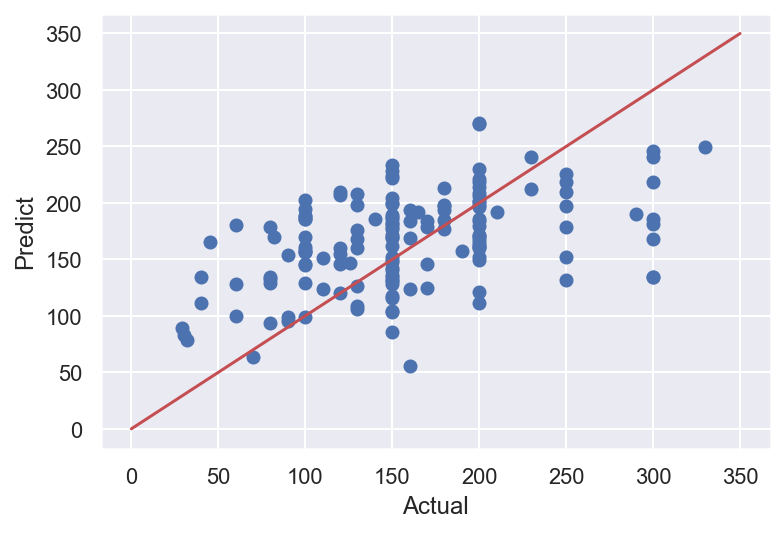

In [21]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual")
plt.ylabel("Predict")
plt.plot([0,350], [0,350], 'r')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(data1[cols], height=2.5)
plt.tight_layout()
plt.show()

In [ ]:
X = data1.drop(['JOBSAL', 'fa_job','life_15', 'fama_rel_15', 'hschool', 'univ_mjor'], axis=1)
y = data1["JOBSAL"]